In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\alexe\Desktop\Технологии программирования\Пропущенные данные\train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#data['Alley']

In [4]:
print("Количество строк = ", data.shape[0])
print("Количество столбцов = ", data.shape[1])

headers = data.columns
count_null = pd.DataFrame(data[headers].isnull().sum())
count_null = count_null.reset_index()
count_null.rename(columns = {'index' : 'Column', 0 : 'Count_null'}, inplace = True) 
count_null
#count_null[count_null['Count_null'] > 730]

Количество строк =  1460
Количество столбцов =  81


,Column,Count_null
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
...,...,...
76,MoSold,0
77,YrSold,0
78,SaleType,0
79,SaleCondition,0


In [5]:
#столбца, в которых допускается значение NaN
column_with_na = {'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'}
count_null = count_null[count_null['Count_null'] != 0].sort_values('Count_null', ascending=False)
count_null

,Column,Count_null
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
58,GarageType,81
59,GarageYrBlt,81
60,GarageFinish,81
63,GarageQual,81


In [6]:
max_null_column = set(count_null['Column'].head(5).values)
colum_for_drop = max_null_column.difference(column_with_na)
colum_for_drop #пусто => не надо удалять колонки
#print(max_null_column, column_with_na)

set()

In [7]:
#пропуски в процентах
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    if (pct_missing != 0):
        print('{} - {}%'.format(col, round(pct_missing*100)))

LotFrontage - 18%
Alley - 94%
MasVnrType - 1%
MasVnrArea - 1%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinType2 - 3%
Electrical - 0%
FireplaceQu - 47%
GarageType - 6%
GarageYrBlt - 6%
GarageFinish - 6%
GarageQual - 6%
GarageCond - 6%
PoolQC - 100%
Fence - 81%
MiscFeature - 96%


### Анализ колонок, в которых есть пропуски
PoolQC - качество бассейна, категориальный признак; пропуски заменяем на No Pool

MiscFeature - разная функция, не включенная в другие категории, категориальный признак; пропуск = not

Alley - тип переулка доступа к собственности, категориальный признак; пропуск = no alley access

Fence - категориальный признак; пропуск = no fence

FireplaceQu - категориальный признак; пропуск = No Fireplace

LotFrontage - линейные футы улицы, связанной с собственностью, **числовой признак**; пропуск = среднее значение

GarageQual - категориальный признак; пропуск = no garage

GarageType - категориальный признак; пропуск = no garage

GarageYrBlt - год постройки гаража, **числовой признак**; пропуск = 0, если GarageType == No garage, иначе среднее значение

GarageCond - категориальный признак; пропуск = no garage

GarageFinish - категориальный признак; пропуск = no garage

BsmtExposure - категориальный признак; пропуск = no basement

BsmtFinType2 - категориальный признак; пропуск = no basement

BsmtFinType1 - категориальный признак; пропуск = no basement

BsmtCond - категориальный признак; пропуск = no basement

BsmtQual - категориальный признак; пропуск = no basement

MasVnrArea - площадь каменной кладки, **числовой признак**; пропуск = 0, если MasVnrType == None, иначе среднее значение

MasVnrType - категориальный признак; пропуск = not

Electrical - категориальный признак; пропуск = самое часто встречаемое значение

In [8]:
#заполним пропуски в категориальных признаках
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['Alley'] = data['Alley'].fillna('No alley') #если alley == nan, то заменяем на 'No alley'
data['Fence'] = data['Fence'].fillna('No Fence')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['MasVnrType'] = data['MasVnrType'].fillna('None')

#Electrical заполним самым популярным
top = data['Electrical'].describe()['top'] # impute with the most frequent value.
data['Electrical'] = data['Electrical'].fillna(top)

In [9]:
#где остались пропуски
def show_null():
    count_null = pd.DataFrame(data[headers].isnull().sum())
    count_null = count_null.reset_index()
    count_null.rename(columns = {'index' : 'Column', 0 : 'Count_null'}, inplace = True) 
    count_null = count_null.sort_values('Count_null', ascending=False)
    return count_null[count_null['Count_null'] != 0]
show_null()

,Column,Count_null
3,LotFrontage,259
59,GarageYrBlt,81
26,MasVnrArea,8


In [10]:
#data[data['MasVnrArea'] == 0]['MasVnrType'] #861
#data[data['MasVnrArea'].isnull()]['MasVnrType']


In [11]:
#заполним числовые признаки
med_lotf = data['LotFrontage'].median()
data['LotFrontage'] = data['LotFrontage'].fillna(med_lotf)

med_garageyr = data['GarageYrBlt'].median()
for i in range (data.shape[0]):
    row = data.loc[i]
    if(pd.isnull(row['GarageYrBlt'])):
        if (row['GarageType'] == 'No Garage'):
            data.loc[i, 'GarageYrBlt'] = 0
        else:
            data.loc[i, 'GarageYrBlt'] = med_garageyr
        
mean_masvnrarea = data['MasVnrArea'].mean()
for i in range (data.shape[0]):
    row = data.loc[i]
    if(pd.isnull(row['MasVnrArea'])):
        if (row['MasVnrType'] == 'None'):
            data.loc[i, 'MasVnrArea'] = 0
        else:
            data.loc[i, 'MasVnrArea'] = mean_masvnrarea

In [12]:
show_null() #пропусков не осталось
#data[data['MasVnrArea'] == 0]

,Column,Count_null


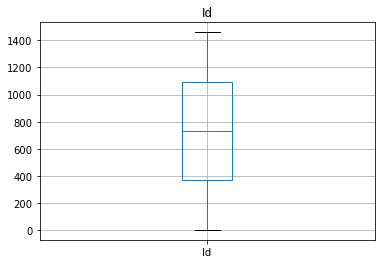

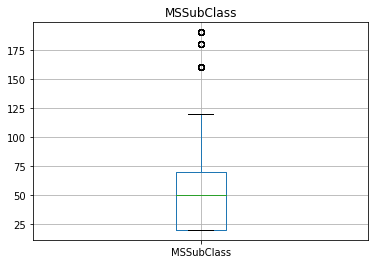

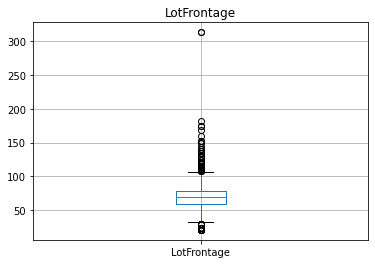

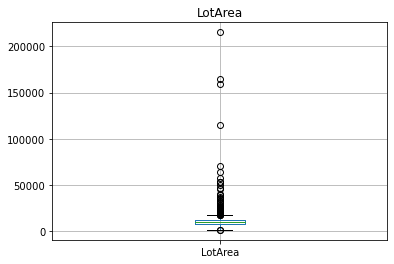

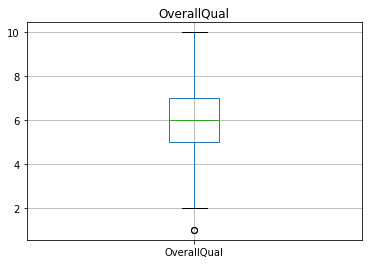

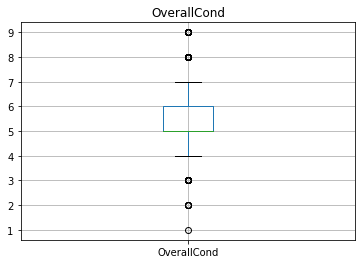

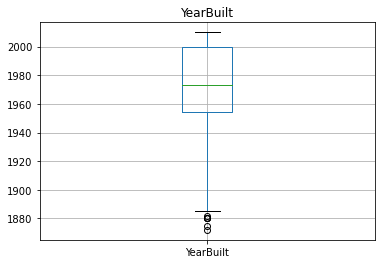

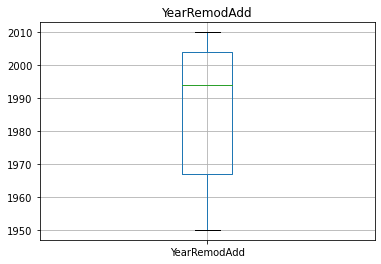

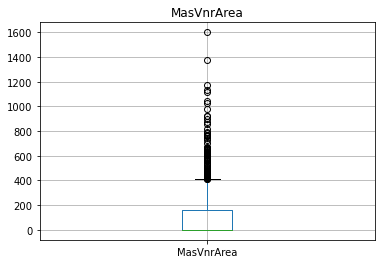

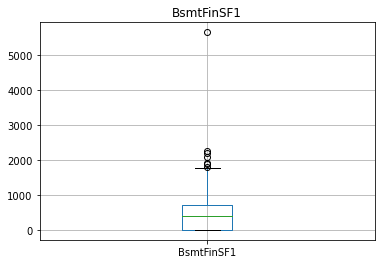

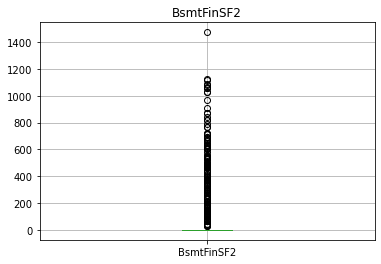

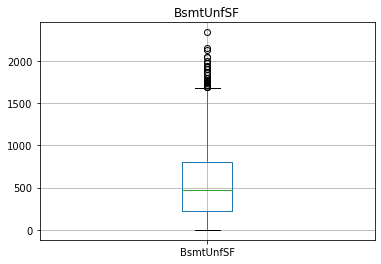

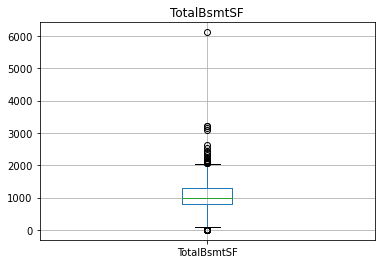

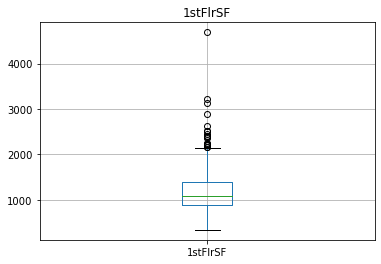

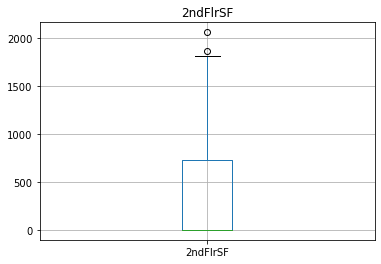

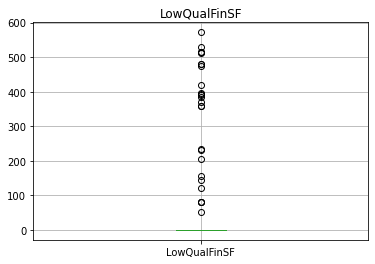

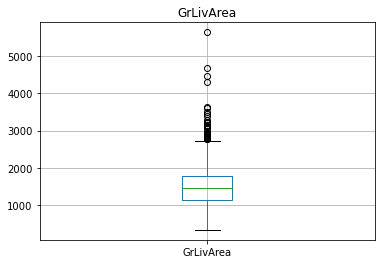

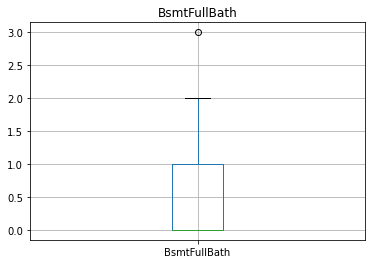

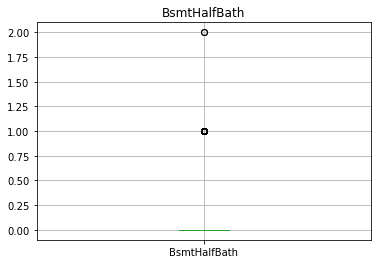

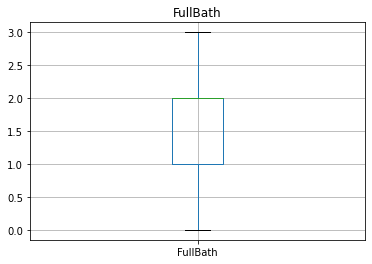

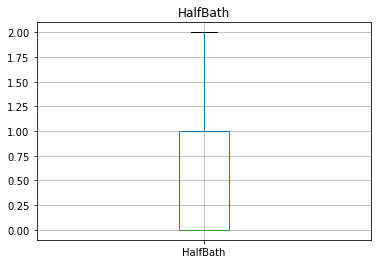

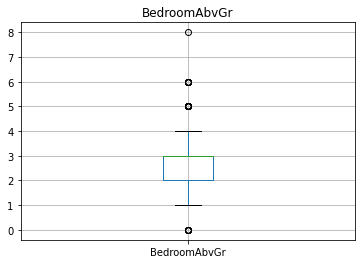

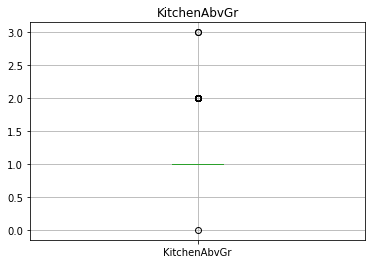

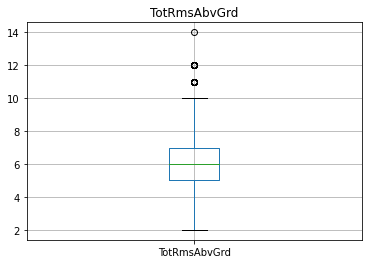

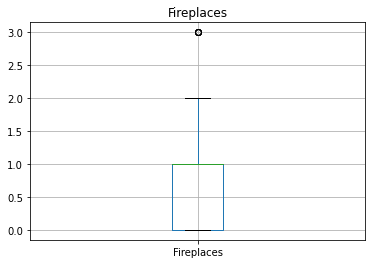

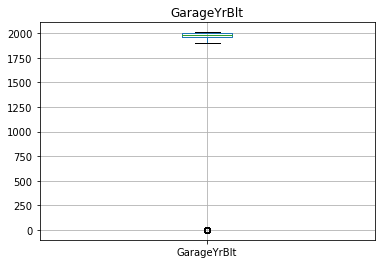

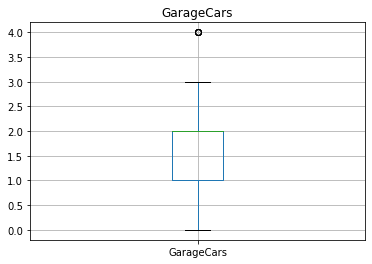

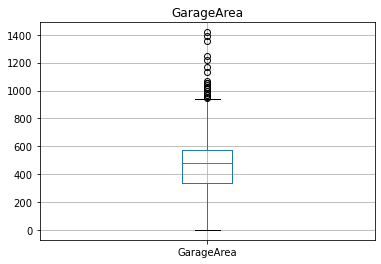

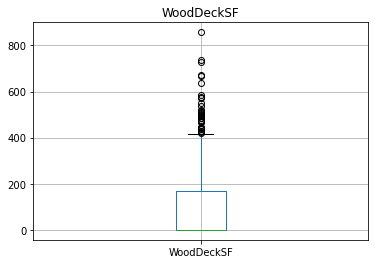

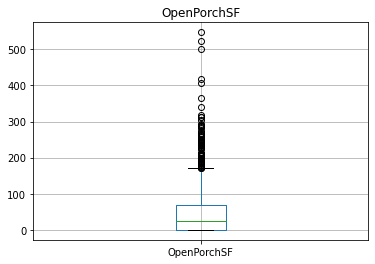

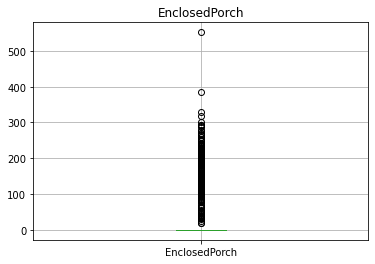

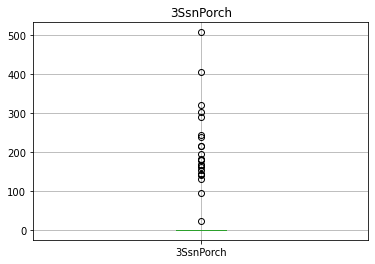

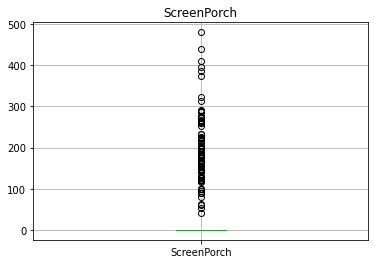

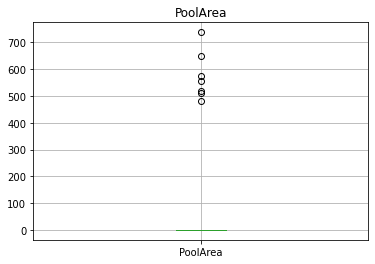

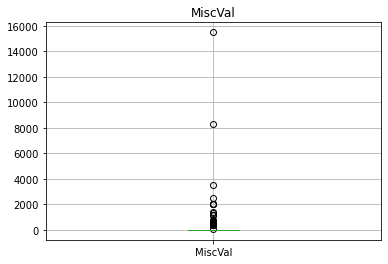

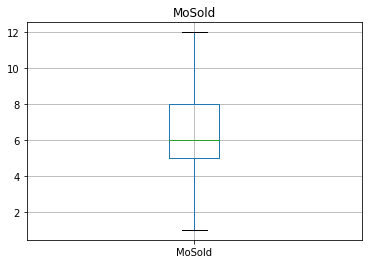

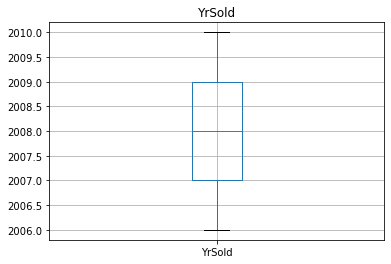

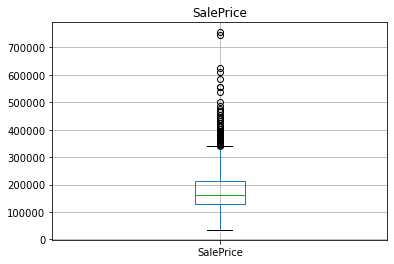

In [13]:
#построим коробчатые диаграммы для численных признаков
#выбросы - точки, которые лежат за границами.
data_numeric = data.select_dtypes(include=['float64', 'int64'])
for column in data_numeric.columns:
    data.boxplot(column=[column])
    plt.title(column)
    plt.show()
# num = list(data_numeric.columns)
# data.boxplot(num)

In [14]:
#заменяем выбросы на nan

#признаки, в которых мы вводили 0, пока не рассматриваем
#GarageYrBlt MasVnrArea

#'MSSubClass', 'OverallQual', 'OverallCond', 'Fireplaces', 'GarageCars' - не рассматриваем, тк первые 3 - категориальные, 2 следующих - количественные 
#Также не рассматриваем признаки, для которых нет самой коробки (иначе удалятся все данные, не равные медиане)
not_see = ['MSSubClass', 'OverallQual', 'EnclosedPorch', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'BsmtFinSF2', 'LowQualFinSF', 'OverallCond', 'KitchenAbvGr', 'BsmtHalfBath', 'Fireplaces', 'GarageCars', 'GarageYrBlt', 'MasVnrArea']

for column in data_numeric:
    if (column in not_see):
        continue
    for x in [column]:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        
        print('Column = ', column, '; Count_value (< min) = ', data.loc[data[x] < min,x].shape[0])
        data.loc[data[x] < min,x] = np.nan
        print('Column = ', column, '; Count_value (> max) = ', data.loc[data[x] > max,x].shape[0])
        data.loc[data[x] > max,x] = np.nan

Column =  Id ; Count_value (< min) =  0
Column =  Id ; Count_value (> max) =  0
Column =  LotFrontage ; Count_value (< min) =  48
Column =  LotFrontage ; Count_value (> max) =  58
Column =  LotArea ; Count_value (< min) =  2
Column =  LotArea ; Count_value (> max) =  67
Column =  YearBuilt ; Count_value (< min) =  7
Column =  YearBuilt ; Count_value (> max) =  0
Column =  YearRemodAdd ; Count_value (< min) =  0
Column =  YearRemodAdd ; Count_value (> max) =  0
Column =  BsmtFinSF1 ; Count_value (< min) =  0
Column =  BsmtFinSF1 ; Count_value (> max) =  7
Column =  BsmtUnfSF ; Count_value (< min) =  0
Column =  BsmtUnfSF ; Count_value (> max) =  29
Column =  TotalBsmtSF ; Count_value (< min) =  37
Column =  TotalBsmtSF ; Count_value (> max) =  24
Column =  1stFlrSF ; Count_value (< min) =  0
Column =  1stFlrSF ; Count_value (> max) =  20
Column =  2ndFlrSF ; Count_value (< min) =  0
Column =  2ndFlrSF ; Count_value (> max) =  2
Column =  GrLivArea ; Count_value (< min) =  0
Column =  Gr

In [15]:
#работаем с GarageYrBlt MasVnrArea

#как видно из коробок с усами, в GarageYrBlt выбросов нет
#оттуда же видно, что в MasVnrArea 0 не является выбросом => стандартно обрабатываем

q75,q25 = np.percentile(data.loc[:,'MasVnrArea'],[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print('Column = ', 'MasVnrArea', '; Count_value (< min) = ', data.loc[data['MasVnrArea'] < min,'MasVnrArea'].shape[0])
data.loc[data['MasVnrArea'] < min,'MasVnrArea'] = np.nan
print('Column = ', 'MasVnrArea', '; Count_value (> max) = ', data.loc[data['MasVnrArea'] > max,'MasVnrArea'].shape[0])
data.loc[data['MasVnrArea'] > max,'MasVnrArea'] = np.nan

Column =  MasVnrArea ; Count_value (< min) =  0
Column =  MasVnrArea ; Count_value (> max) =  98


In [16]:
#смотрим сколько выбросов в каждой колонке
show_null()

,Column,Count_null
3,LotFrontage,106
26,MasVnrArea,98
67,OpenPorchSF,77
4,LotArea,69
80,SalePrice,61
38,TotalBsmtSF,61
51,BedroomAbvGr,35
66,WoodDeckSF,32
46,GrLivArea,31
54,TotRmsAbvGrd,30


In [17]:
data = data.dropna() #удалили выбросы

In [18]:
print("Количество строк = ", data.shape[0])
print("Количество столбцов = ", data.shape[1])

show_null()

Количество строк =  1036
Количество столбцов =  81


,Column,Count_null


In [19]:
# data.boxplot(column=['PoolArea'])
# plt.title('PoolArea')
# plt.show()